<a href="https://colab.research.google.com/github/garestrear/metodos_numericos/blob/main/Ejemplo_M%C3%A9todos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

________________
# <center> ***Un ejemplo de clasificación de imágenes*** </center>

________________


🦎 Iguana solution  🦎

## **Librerias y herramientas especiales**
**Tensorflow** es una herramienta de computación numérica creada por Google. Actualmente se usa para cientos de proyectos de Machine Learning tanto dentro como fuera de esta empresa. Esta disponible para desarrollar en varios lenguajes.

**Keras** es un API (application programming interface: conjunto de subrutinas, funciones o métodos y procedimientos) que funciona  sobre TensorFlow. Fue desarrollada principalmente para que los modelos de Deep Learning sean rápidos y fáciles de usar.

**Numpy** es una librería de Python que extiende las funcionalidades matemáticas, el cálculo matricial y vectorial de este lenguaje.


# Ejemplo: Clasificación de una imágen


In [4]:
import numpy
import tensorflow as tf  
import keras

Importamos el módulo necesario para el trabajo con imágenes de keras.

In [3]:
from keras.preprocessing import image
import matplotlib.pyplot as plt

# Problema 1. 
Supongamos por un momento que tienes una galería de imágenes mezcladas y deseas ordenarlas. 
Queremos usar un modelo de redes neuronales (ya entrenado) para la clasificación de imágenes. 

## ¿Cuál Modelo?
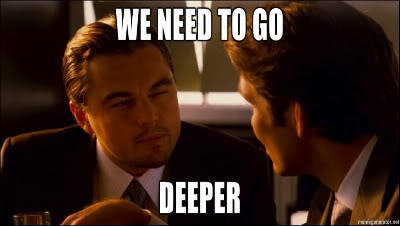

Respuesta: Inception

Ahora importamos **InceptionV3** que es uno de los modelos que trae keras para la clasificación de imágenes. Este modelo **está entrenado** sobre el dataset de **[imagenet de Google](https://www.image-net.org/)** (con 14.197.122 imagenes) y clasifica una imagen en un conjunto de [1000 clases posibles](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a). 

También importamos **decode_predictions** para poder mapear las clases. 

[Click acá para consultar la arquitectura del modelo.](https://software.intel.com/content/www/us/en/develop/articles/inception-v3-deep-convolutional-architecture-for-classifying-acute-myeloidlymphoblastic.html)

[research paper](http://arxiv.org/pdf/1512.00567v3.pdf)

In [2]:
from keras.applications.inception_v3 import InceptionV3, decode_predictions
# Que se sabe sobre ese modelo

Creamos una instancia de nuestro modelo:

In [5]:
iv3 = InceptionV3()

96124928/96112376 [==============================] - 1s 0us/step


Usemos el DRIVE, para cargar una imágen

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Ya lo tenemos todo listo, ahora precedemos a cargar la imagen y construir el tensor de entrada.

Un tensor es un arreglo multidimensional y es la estructura empleada por TensorFlow.

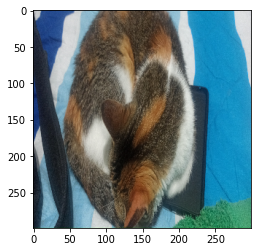

PIL.Image.Image

In [7]:
I=image.load_img("/content/drive/MyDrive/princesa.jpg", target_size=(299, 299))
plt.figure()
plt.imshow(I)
#plt.colorbar()
#plt.grid(False)
plt.show()
type(I)

In [8]:
x = image.img_to_array(I)
#print(x)
type(x)
#print(x)

numpy.ndarray

Con *image.load_img* cargamos la imagen y con *target_size* especificamos con que ancho y alto queremos cargarla.  Con la función *image.img_to_array* convertimos la imagen en un arreglo de tres dimensiones.

Se escoge el valor de 299 porque lo especifica la API.

Si hacemos print(x.shape) la salida será (299, 299, 3) (height, width, RGB).

In [9]:
print(x.shape)

(299, 299, 3)


Los valores de RGB pertenecen al intervalo [0, 255] pero para la entrada debemos transformarlo al intervalo [-1, 1].

In [10]:
# Proceso de normalización
x /= 255
x -= 0.5
x *= 2

Hay que tener en cuenta que el tensor de entrada para InceptionV3 debe tener 4 dimensiones, esto es así porque en la primera dimensión hay que especificarle si la entrada contiene una o más imágenes. Por lo que debemos cambiar la forma de nuestro tensor.

In [11]:
x = x.reshape([1, x.shape[0], x.shape[1], x.shape[2]]) 
print(x.shape)

(1, 299, 299, 3)


Si hacemos print(x.shape) la salida será (1, 299, 299, 3).

Ya podemos hacer que nuestro modelo analice la imagen con la función predict.


In [12]:
y2 = iv3.predict(x)
#print(y2)

Esta función retorna una matriz de 1x1000 que contiene las probabilidades de que la imágen corresponda a cada clase. Por lo que la etiqueta con la probabilidad más alta será la clasificación de nuestra imagen. 

Utilizamos decode_predictions que nos devuelve una matriz con las 5 primeras probabilidades.

In [13]:
print(decode_predictions(y2))

49152/35363 [=========================================] - 0s 0us/step
[[('n02356798', 'fox_squirrel', 0.34580454), ('n02123045', 'tabby', 0.12835883), ('n02325366', 'wood_rabbit', 0.03576023), ('n02326432', 'hare', 0.030692762), ('n02123159', 'tiger_cat', 0.026129121)]]


Y nuestro modelo detcta un acantilado, ;-)

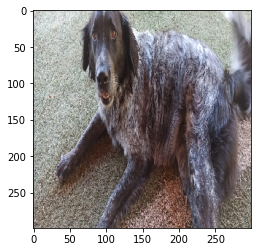

In [ ]:
# otro ejemplo
I3=image.load_img("/content/drive/MyDrive/Iguana-Solution/Redes_Neuronales/lea.jpeg", target_size=(299, 299))
plt.figure()
plt.imshow(I3)
#plt.colorbar()
#plt.grid(False)
plt.show()

In [ ]:
x3 = image.img_to_array(I3)
x3 /= 255
x3 -= 0.5
x3 *= 2

In [ ]:
x3 = x3.reshape([1, x3.shape[0], x3.shape[1], x3.shape[2]]) 
y3 = iv3.predict(x3)
print(decode_predictions(y3))

49152/35363 [=========================================] - 0s 0us/step
[[('n02100236', 'German_short-haired_pointer', 0.37926558), ('n02100735', 'English_setter', 0.059077), ('n02092002', 'Scottish_deerhound', 0.05257886), ('n02090721', 'Irish_wolfhound', 0.04678557), ('n02099267', 'flat-coated_retriever', 0.038537282)]]


# Pensar en entrenar más el modelo
¿Puede modificarse las etiquetas?
 
Respuesta: Si

[Proceso de transferencia de aprendizaje](https://www.tensorflow.org/hub/tutorials/tf2_image_retraining)

Ejercicio. Implementa tu propia búsqueda.

Agrega una imagen a tu Drive, cambia la ruta para leerla y clasifica tu imagen usando *InceptionV3*.

# **Problema 2: Construir una red neuronal usando keras**
En este ejemplo (tomado de https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/),usaremos una base de datos de pacientes del *National Institute of Diabetes and Digestive, Kidney Diseases*. Esta contiene registros de exámenes para el diagnóstico de diabetes  de pacientes mujeres mayores a 21 años de la comunidad indigena Pima (Arizona, Sonora, Chihuahua).  Los registros corresponden a un lapso de 5 años. 


1. Número de embarazos.
2. Cocentración de glucosa en plasma (mg/dl)
3. Presión arterial diastólica (mm Hg).
4. Espesor del pliegue cutáneo del tríceps (mm).
5. Insulina sérica de 2 horas (mu U/ml).
6. Indice de masa corporal.
7. Función genealógica de la diabetes.
8. Edad.
9. Clase (Si se diagnosticó con diabetes)

Puede cargarse el archivo directamente usando la función loadtxt () de NumPy. 

Hay ocho variables de entrada y una variable de salida (la última columna). 

Una vez cargado, podemos dividir el conjunto de datos en variables de entrada (X) y la variable de clase de salida (Y).

In [ ]:
#! pip install pydrive

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
file_id = '1nF3h_IoeUpweV7-LGxd9dIfPkV89rf8q'
downloaded = drive.CreateFile({'id': file_id})
# allows you to temporarily load your file in the notebook VM

# assume the file is called file.csv and it's located at the root of your drive
downloaded.GetContentFile('pima-indians-diabetes.csv')

In [ ]:
drive = GoogleDrive(gauth)
# assume the file is called file.csv and it's located at the root of your drive
file_id = '1nF3h_IoeUpweV7-LGxd9dIfPkV89rf8q'
downloaded = drive.CreateFile({'id': file_id})
# allows you to temporarily load your file in the notebook VM
downloaded.GetContentFile('pima-indians-diabetes.csv')

In [ ]:
import numpy as np
dataset = np.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
print(X)
print(Y)
dataset[1,:]

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
[1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1.
 1. 0. 

array([ 1.   , 85.   , 66.   , 29.   ,  0.   , 26.6  ,  0.351, 31.   ,
        0.   ])

# Con Pandas

In [ ]:
import pandas as pd
df_diabetes=pd.read_csv("pima-indians-diabetes.csv", delimiter=",")
variables=['embarazos','glucosa','presion','espesor','insulina','imc','herencia','edad','Diagnostico']
df_diabetes.columns=variables
df_diabetes.head()

,embarazos,glucosa,presion,espesor,insulina,imc,herencia,edad,Diagnostico
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


# Construcción del modelo usando Keras
Construiremos el modelo como una **secuencia** de capas. Este proceso consiste en adicionar capas secuencialmente hasta que estemos "conformes" con nuestra arquitectura neuronal.

Tener en cuenta:
* La primera cosa que debemos asegurar es que la capa de entrada tenga el número adecuado de entradas.
* Se especifica el número de unidades (neuronas) para cada capa como un argumento de entrada.
* La función de activación es el segundo argumento.
* Para conectar las capas se usa la **clase** *Dense*.

Para este ejemplo los pesos iniciales son un número aleatorio entre 0 y 0.05 (estos son los valores por defecto en keras).

Las funciones de activación que usaremos son:
* Función de rectificación lineal (relu para los amigos) sobre las primeras dos capas.
* Función sigmoide sobre la capa final (Permite representar la salida en términos probabilísticos)

Para conocer  [más sobre funciones de activación pincha acá](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)).

El número de unidades escogido para la primera capa es 12 neuronas las cuales esperan  8 variables de entrada. 

La segunda capa escondida tendrá 8 neuronas.

Finalmente la capa de salida tendrá 1 neurona y su trabajo será predecir la clasificación, es decir, si la persona tiene diabetes o no.


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


## ¡Lista la arquitectura! 
## Ahora hay que definir el **coste**

Costo computacional de las redes neuronales
Comentarios sobre la salidada, probabilistica, estocastica


Ahora debemos definir como medir la calidad del ajuste y como optimizar. 
Esta función es llamada función de pérdida y en este caso usamos "binary_crossentropy".
<center>
<img src="https://github.com/garestrear/introduccion_ML_cursoUN/blob/main/entropia_cruzada.PNG?raw=1" width="250" height="100" align="middle"/> </center>

Es necesario usar un método para optimizar el ajuste, uno de los más usados es *la técnica de descenso al gradiente*

<center>
<img src="https://github.com/garestrear/introduccion_ML_cursoUN/blob/main/gradiente.jfif?raw=1" width="300" height="250" align="middle"/> </center>

[Par conocer más sobre funciones de costo y técnicas de ptimización pincha acá.](https://stats.stackexchange.com/questions/260505/machine-learning-should-i-use-a-categorical-cross-entropy-or-binary-cross-entro#260537)


In [ ]:
  model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

Estamos listos para entrenar nuestro modelo.

Debemos definir un conjunto de entrenamiento. En este caso sólo para efectos ilustrativos usaremos todos los datos de la base de datos.

Se corre varias veces sobre el conjunto de entrenamiento (epochs). En nuestro caso 20 veces con el conjunto run 20 times over the training dataset (20 "epochs") y se actualizan los pesos. En cada *epoch* no se usan todos los datos sino parte de ellos. Usaremos para este ejemplo "lotes" (batches) de 10. 

Si no se desea ver las salidas del proceso se coloca como entrada "verbose=0".

In [ ]:
model.fit(X, Y, epochs=20, batch_size=10,verbose=0)

# ¡Todo está consumado!
Evaluamos la exactitud de nuestro nuevo modelo.

In [ ]:
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

24/24 [==============================] - 0s 1ms/step - loss: 0.6155 - accuracy: 0.6576

accuracy: 65.76%


# Ahora si como debe ser:

In [ ]:
from sklearn.model_selection import train_test_split
from keras.callbacks import History 
history = History()

model_new = Sequential()
model_new.add(Dense(12, input_dim=8, activation='relu'))
model_new.add(Dense(8, activation='relu'))
model_new.add(Dense(1, activation='sigmoid'))
model_new.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)
model_new.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=30, batch_size=10, verbose=0, callbacks=[history])
scores = model_new.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model_new.metrics_names[1], scores[1]*100))

accuracy: 66.23%


In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


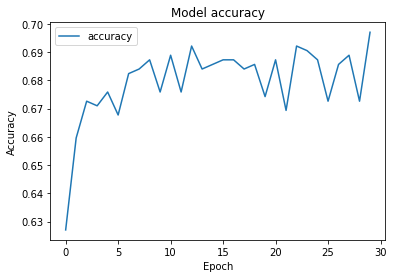

In [ ]:
%matplotlib inline
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"], label='accuracy')
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.show()

# Podemos hacer predicciones

In [ ]:
X_test[0]
type(X_test)

numpy.ndarray

In [ ]:
predictions = model_new.predict(X_test)
print(predictions)

[[0.3139994 ]
 [0.3139994 ]
 [0.3139994 ]
 [0.9342035 ]
 [0.19491386]
 [0.71017444]
 [0.3139994 ]
 [0.3139994 ]
 [0.3139994 ]
 [0.7488314 ]
 [0.3139994 ]
 [0.645826  ]
 [0.10918233]
 [0.6922715 ]
 [0.3139994 ]
 [0.3139994 ]
 [0.3139994 ]
 [0.3139994 ]
 [0.3139994 ]
 [0.21158832]
 [0.3139994 ]
 [0.3139994 ]
 [0.45159152]
 [0.48457292]
 [0.3139994 ]
 [0.3139994 ]
 [0.30533302]
 [0.3139994 ]
 [0.20951548]
 [0.3139994 ]
 [0.15708348]
 [0.26620924]
 [0.3139994 ]
 [0.3139994 ]
 [0.52027285]
 [0.3139994 ]
 [0.3139994 ]
 [0.3139994 ]
 [0.3139994 ]
 [0.3139994 ]
 [0.3139994 ]
 [0.308392  ]
 [0.3139994 ]
 [0.3139994 ]
 [0.3139994 ]
 [0.3139994 ]
 [0.3139994 ]
 [0.3139994 ]
 [0.5002072 ]
 [0.30008632]
 [0.3139994 ]
 [0.3139994 ]
 [0.3139994 ]
 [0.3139994 ]
 [0.287891  ]
 [0.3139994 ]
 [0.3139994 ]
 [0.3139994 ]
 [0.3139994 ]
 [0.7275091 ]
 [0.3139994 ]
 [0.3139994 ]
 [0.31735078]
 [0.3139994 ]
 [0.10190538]
 [0.3139994 ]
 [0.3139994 ]
 [0.3139994 ]
 [0.3139994 ]
 [0.2787866 ]
 [0.327084  ]
 [0.31

# Problema 3: Clasificación de imágenes de prendas



En este ejemplo se entrena un modelo de red neuronal para clasificar imagenes de prendas como  tennis, pantalones, camisetas y accesorios. 

In [ ]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.5.0


Esta guia usa el set de datos de [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)
que contiene mas de 70,000 imagenes en 10 categorias. Las imagenes muestran articulos individuales de ropa a una resolucion baja (28 por 28 pixeles) como se ve aca:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Moda MNIST esta construida como un reemplazo para el set de datos clasico [MNIST](http://yann.lecun.com/exdb/mnist/) 
casi siempre utilizado como el "Hola Mundo" de programas de aprendizaje automatico (ML) para computo de vision. El set de datos de MNIST contiene imagenes de digitos escrito a mano (0, 1, 2, etc.) en un formato identico al de los articulos de ropa que va a utilizar aca.

Esta guia utiliza Moda MNIST para variedad y por que es un poco mas retador que la regular MNIST. Ambos set de datos son relativamente pequenos y son usados para verificar que el algoritmo funciona como debe.

Aca, 60,000 imagenes son usadas para entrenar la red neuronal y 10,000 imagenes son usadas para evaluar que tan exacto aprendia la red a clasificar imagenes. Pueden acceder al set de moda de MNIST directamente desde TensorFlow. Para importar y cargar el set de datos de MNIST directamente de TensorFlow:

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Al cargar el set de datos retorna cuatro arreglos en NumPy:

* El arreglo `train_images` y `train_labels` son los arreglos que *training set*—el modelo de datos usa para aprender.
* El modelo es probado contra los arreglos *test set*, el `test_images`, y `test_labels`.

Las imagenes son 28x28 arreglos de NumPy, con valores de pixel que varian de 0 a 255. Los *labels* son un arreglo de integros, que van del 0 al 9. Estos corresponden a la *class* de ropa que la imagen representa.

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Cada imagen es mapeada a una única etiqueta. Ya que los *Class names* no estan incluidos en el dataset, almacene acá para usarlos luego cuando se visualicen las imagenes:

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore el set de datos

Explore el formato de el set de datos antes de entrenar el modelo. Lo siguiente muestra que hay 60,000 imagenes en el set de entrenamiento, con cada imagen representada por pixeles de 28x28:

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

Cada etiqueta es un entero entre 0 y 9:

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Hay 10,000 imagenes en el set de pruebas. Otra vez, cada imagen es representada como pixeles de 28x28:

In [ ]:
test_images.shape

(10000, 28, 28)

## Pre-procese el set de datos

El set de datos debe ser pre-procesada antes de entrenar la red. Si usted inspecciona la primera imagen en el set de entrenamiento, va a encontrar que los valores de los pixeles estan entre 0 y 255:

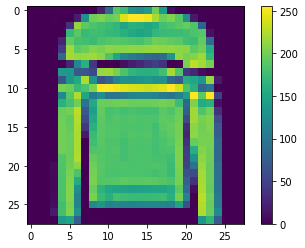

In [ ]:
plt.figure()
plt.imshow(train_images[5])
plt.colorbar()
plt.grid(False)
plt.show()

Escale estos valores en un rango de 0 a 1 antes de alimentarlos al modelo de la red neuronal. Para hacero, divida los valores por 255. Es importante que el *training set* y el *testing set* se pre-procesen de la misma forma:

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Para verificar que el set de datos esta en el formato adecuado y que estan listos para construir y entrenar la red, vamos a desplegar las primeras 25 imagenes de el *training set* y despleguemos el nombre de cada clase debajo de cada imagen.

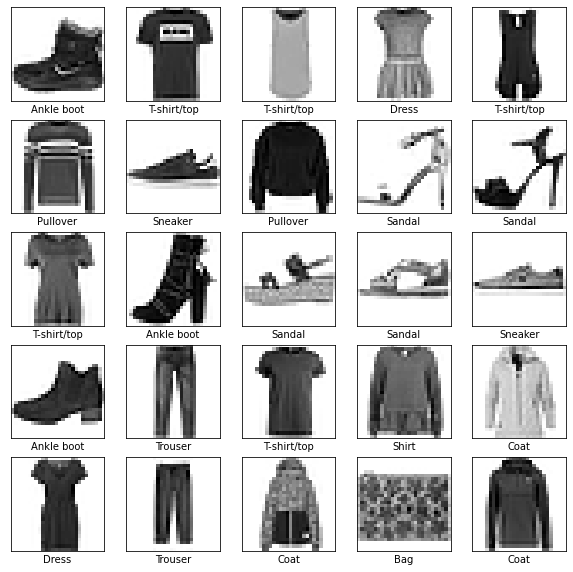

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Construir el Modelo

Construir la red neuronal requiere configurar las capas del modelo y luego compilar el modelo.

### Configurar las Capas

Los bloques de construccion basicos de una red neuronal son las *capas* o *layers*. Las capas extraen representaciones de el set de datos que se les alimentan. Con suerte, estas representaciones son considerables para el problema que estamos solucionando.

La mayoria de aprendizaje profundo consiste de unir capas sencillas. 
La mayoria de las capas como `tf.keras.layers.Dense`, tienen parametros que son aprendidos durante el entrenamiento.

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

La primera capa de esta red, `tf.keras.layers.Flatten`, 
transforma el formato de las imagenes de un arreglo bi-dimensional (de 28 por 28 pixeles) a un arreglo uni dimensional (de 28*28 pixeles = 784 pixeles). Observe esta capa como una capa no apilada de filas de pixeles en la misma imagen y alineandolo. Esta capa no tiene parametros que aprender; solo reformatea el set de datos.

Despues de que los pixeles estan "aplanados", la secuencia consiste de dos capas`tf.keras.layers.Dense`. Estas estan densamente conectadas, o completamente conectadas. La primera capa `Dense` tiene 128 nodos (o neuronas). La segunda (y ultima) capa es una capa de 10 nodos *softmax* que devuelve un arreglo de 10 probabilidades que suman a 1. Cada nodo contiene una calificacion que indica la probabilidad que la actual imagen pertenece a una de las 10 clases.

### Compile el modelo

Antes de que el modelo este listo para entrenar , se necesitan algunas configuraciones mas. Estas son agregadas durante el paso de compilacion del modelo:

* *Loss function* —Esto mide que tan exacto es el modelo durante el entrenamiento. Quiere minimizar esta funcion para dirigir el modelo en la direccion adecuada.
* *Optimizer* — Esto es como el modelo se actualiza basado en el set de datos que ve y la funcion de perdida.
* *Metrics* — Se usan para monitorear los pasos de entrenamiento y de pruebas.
El siguiente ejemplo usa *accuracy* (exactitud) , la fraccion de la imagenes que son correctamente clasificadas.

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Entrenar el Modelo

Entrenar el modelo de red neuronal requiere de los siguientes pasos:

1. Entregue los datos de entrenamiento al modelo. En este ejemplo , el set de datos de entrenamiento estan en los arreglos `train_images` y `train_labels`.
2. El modelo aprende a asociar imagenes y etiquetas.
3. Usted le pregunta al modelo que haga predicciones sobre un set de datos que se encuentran en el ejemplo,incluido en el arreglo `test_images`. Verifique que las predicciones sean iguales a las etiquetas de el arreglo`test_labels`.

Para comenzar a entrenar, llame el metodo `model.fit`, es llamado asi por que *fit* (ajusta) el modelo a el set de datos de entrenamiento:

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5013 - accuracy: 0.8246
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3781 - accuracy: 0.8628
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3388 - accuracy: 0.8765
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3140 - accuracy: 0.8850
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2962 - accuracy: 0.8906
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2814 - accuracy: 0.8952
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2678 - accuracy: 0.9012
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2564 - accuracy: 0.9040
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2499 - accuracy: 0.9063
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.238

A medida que el modelo entrena, la perdida y la exactitud son desplegadas. Este modelo alcanza una exactitud de 0.88 (o 88%) sobre el set de datos de entrenamiento.

## Evaluar Exactitud

Siguente, compare como el rendimiento del modelo sobre el set de datos:

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3401 - accuracy: 0.8810

Test accuracy: 0.8809999823570251


Resulta que la exactitud sobre el set de datos es un poco menor que la exactitud sobre el set de entrenamiento. Esta diferencia entre el entrenamiento y el test se debe a *overfitting* (sobre ajuste). Sobre ajuste sucede cuando un modelo de aprendizaje de maquina (ML) tiene un rendimiento peor sobre un set de datos nuevo, que nunca antes ha visto comparado con el de entrenamiento.

## Hacer predicciones

Con el modelo entrenado usted puede usarlo para hacer predicciones sobre imagenes.

Aca, el modelo ha predecido la etiqueta para cada imagen en el set de datos de *test* (prueba). Miremos la primera prediccion:

In [ ]:
predictions = model.predict(test_images)

*una* prediccion es un arreglo de 10 numeros. Estos representan el nivel de "confianza" del modelo sobre las imagenes de cada uno de los 10 articulos de moda/ropa. Ustedes pueden revisar cual tiene el nivel mas alto de confianza:

In [ ]:
np.argmax(predictions[0])

9

Entonces,el modelo tiene mayor confianza que esta imagen es un bota de tobillo "ankle boot" o `class_names[9]`. Examinando las etiquetas de *test* o de pruebas muestra que esta clasificaion es correcta:

In [ ]:
test_labels[0]

9

**Grafique** esto para poder ver todo el set de la prediccion de las 10 clases.

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Miremos la imagen [0], sus predicciones y el arreglo de predicciones. Las etiquetas de prediccion correctas estan en azul y las incorrectas estan en rojo. El numero entrega el porcentaje (sobre 100) para la etiqueta predecida.

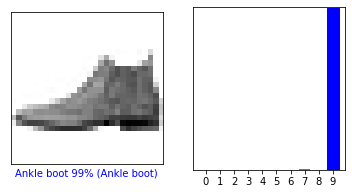

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

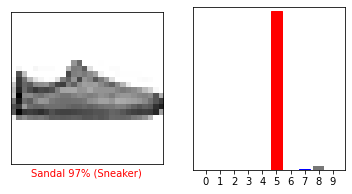

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Vamos a graficar multiples imagenes con sus predicciones. Notese que el modelo puede estar equivocado aun cuando tiene mucha confianza.

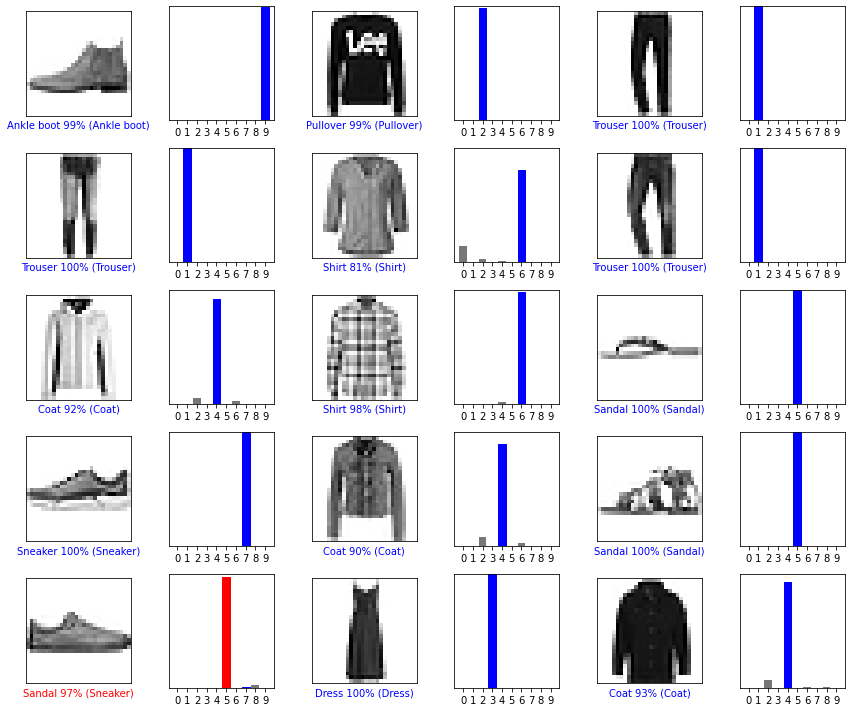

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

*Finalmente*, usamos el modelo entrenado para hacer una prediccion sobre una unica imagen.

In [ ]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

Los modelos de `tf.keras` son optimizados sobre *batch* o bloques, 
o coleciones de ejemplos por vez.
De acuerdo a esto, aunque use una unica imagen toca agregarla a una lista:

In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

Ahora prediga la etiqueta correcta para esta imagen:

In [ ]:
predictions_single = model.predict(img)

print(predictions_single)

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

`model.predict` retorna una lista de listas para cada imagen dentro del *batch* o bloque de datos. Tome la prediccion para nuestra unica imagen dentro del *batch* o bloque:

In [ ]:
np.argmax(predictions_single[0])

## Future work. Redes neuronales convolucionales ─ CNN, ConvNet para un problema de clasificación de plantas sanas/enfermas

# Camino de la fama de las funciones de activación
[Ejemplos de funciones de activación](https://github.com/garestrear/Curso_de_Python/blob/master/RedesNeuronales_Supervisado.ipynb)

<h4>Habíamos dicho que una neurona toma $n$ entradas y produce una única salida, asumamos que en nuestro caso la función de activación es la sigmoide:</h4>


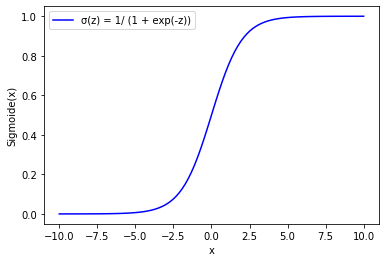

In [ ]:
#@title Función de activación Sigmoide 
x = np.linspace(-10, 10, 100) 
z = 1/(1 + np.exp(-x)) 
  
plt.plot(x, z, c = 'b') 
plt.xlabel("x") 
plt.ylabel("Sigmoide(x)") 
plt.legend(['σ(z) = 1/ (1 + exp(-z))'])

plt.show() 

$$\sigma(z)=\frac{1}{1+\exp (-z)}$$

<h4>donde</h4> $$\sigma(z) \in(0,1)$$

<h4>El gradiente de $\sigma(z)$ es:</h4>

$$ \sigma^{\prime}(z)=\frac{-\exp (-z)}{1+\exp (-z)}=\sigma(z)(1-\sigma(z))$$

<h4>
Supongamos que tenemos una única capa de $m$ neuronas. Si nos referimos a los pesos de las diferentes neuronas como $\left\{w^{(1)}, \cdots, w^{(m)}\right\}$ 
y a los sesgos como $\left\{b_{1}, \cdots, b_{m}\right\},$ podemos decir que las respectivas activaciones son $\left\{a_{1}, \cdots, a_{m}\right\}$:
</h4>
$$
\begin{aligned}
a_{1} &=\frac{1}{1+\exp \left(-(w^{(1) T} x+b_{1})\right)} \\
\vdots & \\
a_{m} &=\frac{1}{1+\exp \left(-(w^{(m) T} x+b_{m})\right)}
\end{aligned}
$$

<h4>
Reescribiendo:
</h4>
<div align='center'>
$
\sigma(z)=\left[\begin{array}{c}
\frac{1}{1+\exp \left(z_{1}\right)} \\
\vdots \\
\frac{1}{1+\exp \left(z_{m}\right)}
\end{array}\right], \qquad
b=\left[\begin{array}{c}
b_{1} \\
\vdots \\
b_{m}
\end{array}\right] \in \mathbb{R}^{m}, \qquad
W=\left[\begin{array}{ccc}
- & w^{(1) T} & - \\
& \ldots & \\
- & w^{(m) T} & -
\end{array}\right] \in \mathbb{R}^{m \times n}
$
</div>
<h4>
Reescribiendo de nuevo:
</h4>
<div align='center'>
$
z=W x+b, \qquad
\left[\begin{array}{c}
a^{(1)} \\
\vdots \\
a^{(m)}
\end{array}\right]=\sigma(z)=\sigma(W x+b)
$
</div>

## <div align='justify'>
**Entonces, ¿qué nos dicen realmente estas activaciones? 

Uno puede pensar en estas activaciones como indicadores de la presencia de alguna combinación ponderada de características. Entonces podemos usar una combinación de estas activaciones para realizar tareas de clasificación.**


</h4>
</div>